# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [3]:
appl_model_data = pd.read_csv(r"D:\EU School\Academics\3rd Semester\Business Intelligence\Final Assessment\Stock-Market-Project\ML_Model\data\AAPL_cleaned.csv")

appl_model_data.tail()

,Date,Open,High,Low,Close,Volume,% Change,SMA_30,SMA_200,RSI,Volume_MA_20,Volatility_30
1252,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,2.713277,237.262992,210.168764,74.333136,50408480.0,0.893889
1253,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,0.282609,238.276880,210.583631,72.218339,47062575.0,0.857641
1254,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,1.056788,239.395514,211.010922,73.682465,46125120.0,0.856599
1255,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,-0.139438,240.520134,211.438305,75.495555,46567965.0,0.853904
1256,2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500,-2.171968,241.424951,211.837060,65.393733,46921770.0,0.981081


In [4]:
appl_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1257 non-null   object 
 1   Open           1257 non-null   float64
 2   High           1257 non-null   float64
 3   Low            1257 non-null   float64
 4   Close          1257 non-null   float64
 5   Volume         1257 non-null   int64  
 6   % Change       1256 non-null   float64
 7   SMA_30         1228 non-null   float64
 8   SMA_200        1058 non-null   float64
 9   RSI            1244 non-null   float64
 10  Volume_MA_20   1238 non-null   float64
 11  Volatility_30  1227 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 118.0+ KB


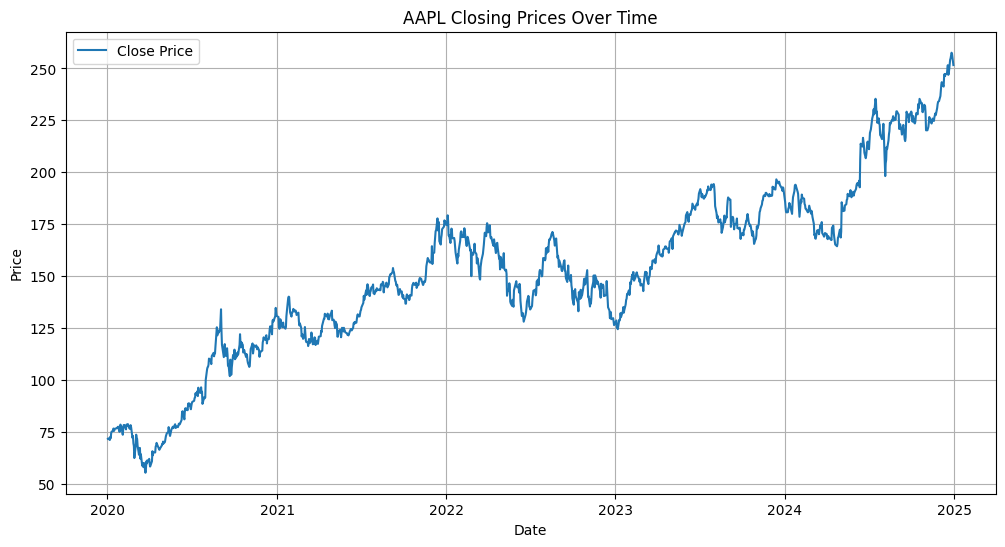

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(appl_model_data['Date']), appl_model_data['Close'], label='Close Price')
plt.title("AAPL Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()


# Modeling Objectives
Drop rows with NaNs since they're mostly from rolling indicators
We will then Create Target column
We will close by selecting features and target

In [10]:
appl_model_data = appl_model_data.dropna().copy()

appl_model_data['Target'] = appl_model_data['Close'].shift(-1)
appl_model_data = appl_model_data[:-1]

feature_cols = ['Open', 'High', 'Low', 'Volume', '% Change', 'SMA_30', 'SMA_200', 'RSI', 'Volume_MA_20', 'Volatility_30']
X = appl_model_data[feature_cols]
y = appl_model_data['Target']

appl_model_data.head()

,Date,Open,High,Low,Close,Volume,% Change,SMA_30,SMA_200,RSI,Volume_MA_20,Volatility_30,Target
199,2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,-1.884297,112.270282,85.946246,63.048461,154464165.0,3.915576,118.105082
200,2020-10-16,115.904243,118.368018,115.699742,118.105082,115393800,2.156313,112.087528,86.178636,58.853424,145878610.0,3.685916,116.819646
201,2020-10-19,112.943840,117.267603,112.632217,116.819646,120639300,-1.088384,112.083956,86.403499,57.457923,142124885.0,3.553767,113.158066
202,2020-10-20,114.433777,115.865296,112.602988,113.158066,124423700,-3.134388,112.156992,86.614116,53.068469,139193300.0,3.472739,113.615778
203,2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,0.404490,112.137841,86.819707,48.648641,136154665.0,3.433464,114.375350


# train-test split and model selection
Will start by spliting the dataset (80% train, 20% test)
Then later use a Random Forest Regressor as our baseline ML model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Ridge Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


✅ Ridge Regression Performance:
Mean Absolute Error: 1.35
Mean Squared Error: 5.62
R² Score: 0.9914


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.33601e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Forecasting future stock prices

In [19]:
# Use the last known row as a starting point
last_known = X.iloc[-1].copy()

future_preds = []

for i in range(7):  # Forecast 7 days
    next_pred = ridge_model.predict(last_known.values.reshape(1, -1))[0]
    future_preds.append(next_pred)
    
    # Shift features logically if needed (very basic simulation)
    last_known['Open'] = next_pred
    last_known['High'] = next_pred * 1.01
    last_known['Low'] = next_pred * 0.99
    last_known['Volume'] = last_known['Volume']  # could adjust
    last_known['% Change'] = 0
    last_known['SMA_30'] = ((last_known['SMA_30'] * 29) + next_pred) / 30
    last_known['SMA_200'] = ((last_known['SMA_200'] * 199) + next_pred) / 200
    last_known['RSI'] = 50  # fixed for demo
    last_known['Volume_MA_20'] = last_known['Volume']  # constant
    last_known['Volatility_30'] = last_known['Volatility_30']  # constant

# Display forecasted prices
for i, price in enumerate(future_preds, 1):
    print(f"Day {i}: ${price:.2f}")


Day 1: $256.99
Day 2: $256.71
Day 3: $256.41
Day 4: $256.11
Day 5: $255.79
Day 6: $255.46
Day 7: $255.12


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature

In [23]:
import os
import pickle

os.makedirs("Model", exist_ok=True)

with open("Model/ridge_model.pkl", "wb") as file:
    pickle.dump(ridge_model, file)


In [24]:
import streamlit as st
import pickle
import numpy as np

with open("Model/ridge_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Stock Price Predictor (Ridge Regression)")
st.markdown("Enter feature values to predict the stock's **closing price**.")

# Input fields for each feature
features = [
    "Open", "High", "Low", "Volume",
    "% Change", "SMA_30", "SMA_200",
    "RSI", "Volume_MA_20", "Volatility_30"
]

inputs = []
for feature in features:
    value = st.number_input(f"{feature}", format="%.4f")
    inputs.append(value)

# Predict button
if st.button("Predict"):
    input_array = np.array(inputs).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    st.success(f"Predicted Closing Price: **${prediction:.2f}**")


2025-05-26 22:23:55.717 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 22:23:56.401 
  command:

    streamlit run c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-26 22:23:56.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 22:23:56.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 22:23:56.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 22:23:56.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 22:23:56.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 22:23:5